In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
import pickle

In [2]:
forecasting = pd.read_csv("cleaned_weather[1].csv")

In [3]:
forecasting

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,1234.61,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40
52692,2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,...,1235.20,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42
52693,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,1235.82,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45
52694,2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,...,1235.49,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47


In [4]:
#p (Pressure)
#Tpot (Potential Temperature)
#Tdew (Dew Point Temperature)
#rh (Relative Humidity)
#VPmax (Maximum Vapor Pressure)
#VPact (Actual Vapor Pressure)
#VPdef (Vapor Pressure Deficit)
#sh (Specific Humidity)
#H2OC (Water Vapor Concentration)
#rho (Air Density)
#wv (Wind Speed)
#max. wv (Maximum Wind Speed)
#wd (Wind Direction)
#rain or raining (Rainfall Indicator)

In [5]:
forecasting.describe()

,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,1210.882855,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,36.430222,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,1107.380000,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,1183.900000,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000
50%,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,1210.800000,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000
75%,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,1236.550000,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500
max,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,1318.520000,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000


In [6]:
forecasting.duplicated().sum()

1

In [7]:
forecasting.columns.to_list()

['date',
 'p',
 'T',
 'Tpot',
 'Tdew',
 'rh',
 'VPmax',
 'VPact',
 'VPdef',
 'sh',
 'H2OC',
 'rho',
 'wv',
 'max. wv',
 'wd',
 'rain',
 'raining',
 'SWDR',
 'PAR',
 'max. PAR',
 'Tlog']

In [8]:
forecasting.duplicated().sum()

1

In [9]:
forecasting.drop_duplicates(inplace = True)

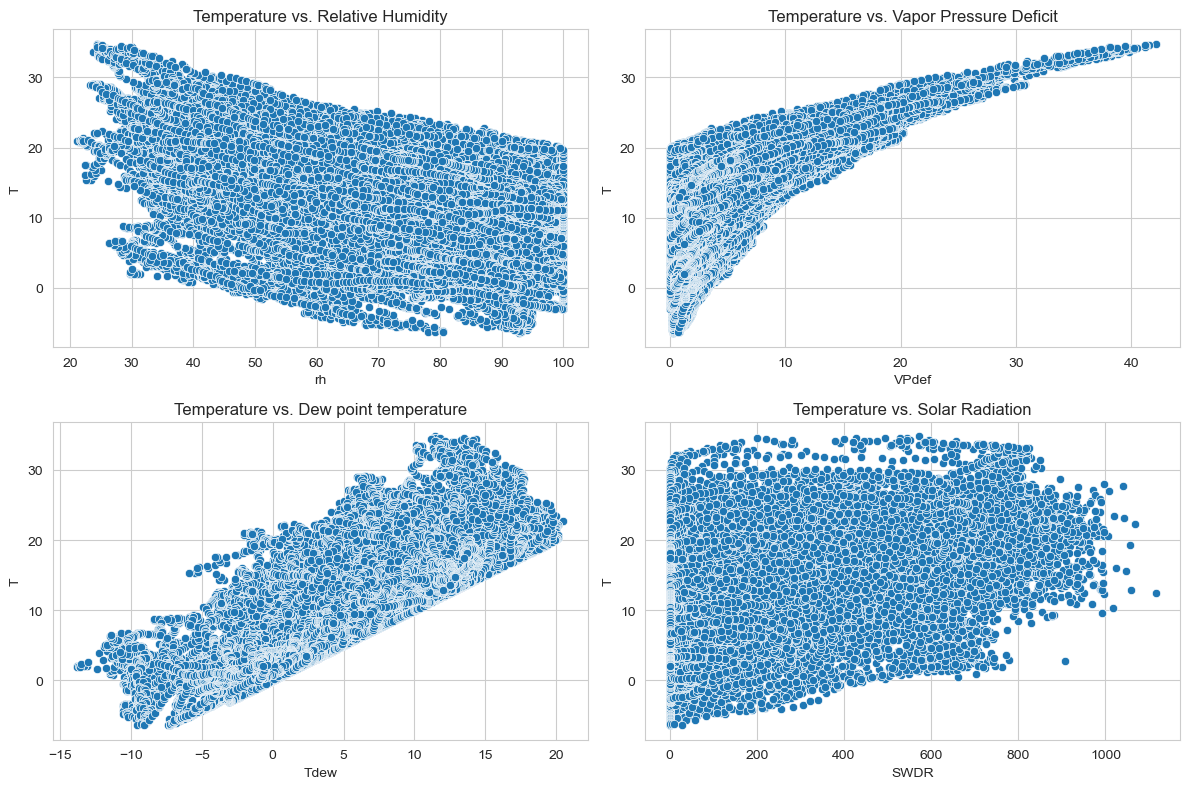

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(x=forecasting["rh"], y=forecasting["T"], ax=axs[0, 0])
axs[0, 0].set_title("Temperature vs. Relative Humidity") 
sns.scatterplot(x=forecasting["VPdef"], y=forecasting["T"], ax=axs[0, 1]) 
axs[0, 1].set_title("Temperature vs. Vapor Pressure Deficit") 
sns.scatterplot(x=forecasting["Tdew"], y=forecasting["T"], ax=axs[1, 0]) 
axs[1, 0].set_title("Temperature vs. Dew point temperature") 
sns.scatterplot(x=forecasting["SWDR"], y=forecasting["T"], ax=axs[1, 1])
axs[1, 1].set_title("Temperature vs. Solar Radiation")
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


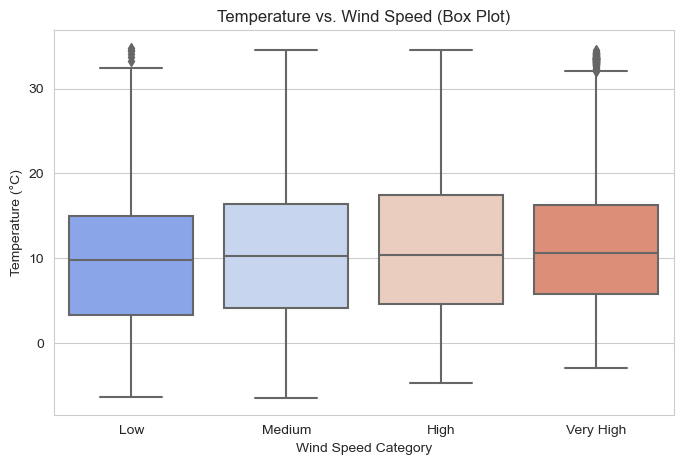

In [11]:
forecasting['wv_category'] = pd.qcut(forecasting['wv'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(8, 5))
sns.boxplot(data=forecasting, x='wv_category', y='T', palette="coolwarm")
plt.title("Temperature vs. Wind Speed (Box Plot)")
plt.xlabel("Wind Speed Category")
plt.ylabel("Temperature (°C)")
plt.show()

In [12]:
X = forecasting.drop(columns=["T","date","wv_category"])  

In [13]:
X

,p,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,1008.89,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,1008.76,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,1008.66,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,1008.64,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
4,1008.61,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,978.32,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,5.89,1234.61,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40
52692,978.30,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,6.05,1235.20,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42
52693,978.26,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,5.93,1235.82,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45
52694,978.26,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,5.90,1235.49,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47


In [14]:
y = forecasting["T"]

In [15]:
y

0        0.71
1        0.75
2        0.73
3        0.37
4        0.33
         ... 
52691    2.28
52692    2.13
52693    1.99
52694    2.07
52695    2.01
Name: T, Length: 52695, dtype: float64

In [16]:
cor=X.corr()

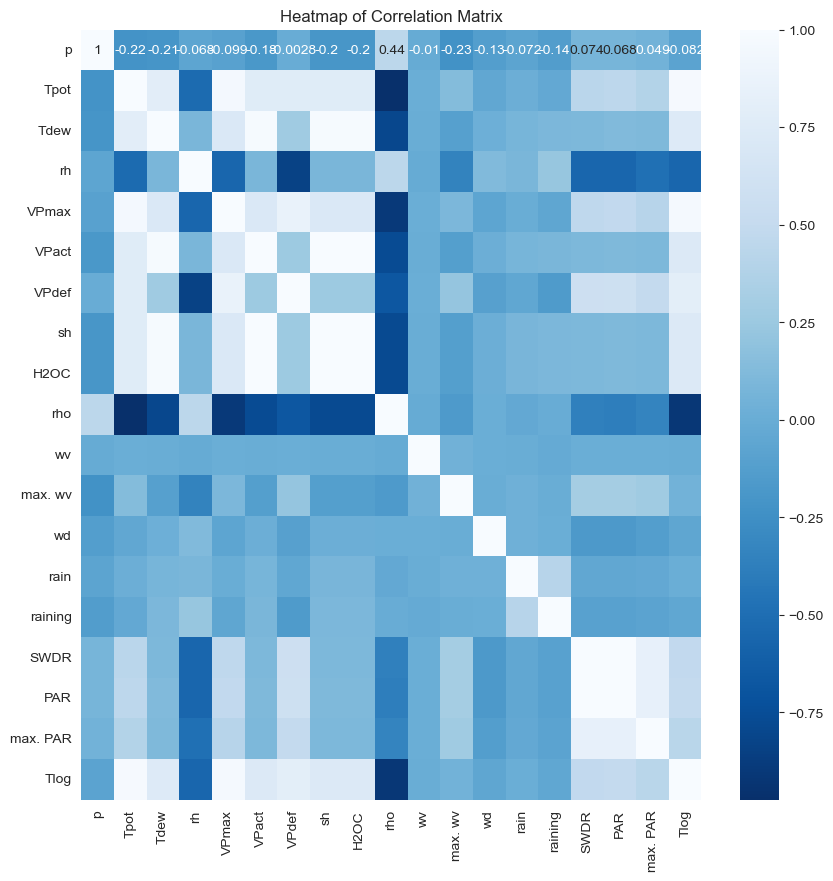

In [17]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues_r)
plt.title("Heatmap of Correlation Matrix") 
plt.show()

In [18]:
#with the following function we can select highly correlated feature 
#it will remove the first
def correlation(forecasting,threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = forecasting.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  #getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(X,0.9)
len(set(corr_features))

7

In [20]:
corr_features

{'H2OC', 'PAR', 'Tlog', 'VPact', 'VPmax', 'rho', 'sh'}

In [21]:
X.drop(corr_features,axis=1)

,p,Tpot,Tdew,rh,VPdef,wv,max. wv,wd,rain,raining,SWDR,max. PAR
0,1008.89,273.18,-1.33,86.1,0.89,1.02,1.60,224.3,0.0,0.0,0.0,0.0
1,1008.76,273.22,-1.44,85.2,0.95,0.43,0.84,206.8,0.0,0.0,0.0,0.0
2,1008.66,273.21,-1.48,85.1,0.96,0.61,1.48,197.1,0.0,0.0,0.0,0.0
3,1008.64,272.86,-1.64,86.3,0.86,1.11,1.48,206.4,0.0,0.0,0.0,0.0
4,1008.61,272.82,-1.50,87.4,0.79,0.49,1.40,209.6,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52691,978.32,277.16,-0.80,80.0,1.44,0.73,1.40,180.6,0.0,0.0,0.0,0.0
52692,978.30,277.01,-0.43,83.1,1.20,0.43,0.82,174.0,0.0,0.0,0.0,0.0
52693,978.26,276.88,-0.71,82.2,1.26,0.38,0.76,248.9,0.0,0.0,0.0,0.0
52694,978.26,276.95,-0.77,81.4,1.32,0.57,1.07,196.6,0.0,0.0,0.0,0.0


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [24]:
lr.intercept_

-306.12974284453924

In [25]:
lr.coef_

array([ 1.03244567e-01,  8.70815610e-01, -4.30832661e-03,  4.16311323e-04,
        8.83065048e-02,  1.58161051e-01, -7.59054434e-02, -1.88055711e-01,
       -1.21820446e-01, -2.75582795e-02, -2.53998614e-07, -7.89660799e-04,
       -4.95610294e-06,  1.43097082e-03, -2.87858855e-06, -6.32869293e-05,
        3.45113606e-05,  4.68128731e-07, -2.98537744e-04])

In [26]:
lr.score(X,y)

0.9999984502696384

# By random forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
Rf = RandomForestRegressor(n_estimators=2)
Rf.fit(X, y)

RandomForestRegressor(n_estimators=2)

In [29]:
Rf.score(X,y)

0.9999997901915355

In [31]:
with open("model.pkl","wb")as file:
    pickle.dump(Rf,file)

In [32]:
pip install flask

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [35]:
from flask import Flask, request,jsonify,render_template

In [40]:
ap = Flask(__name__)
model = pickle.load(open("model.pkl","rb"))

In [41]:
@app.route("/")
def home():
    return render_template("index.html")

In [50]:
@app.route("/predict",methods=["POST"])
def predict():
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

AssertionError: View function mapping is overwriting an existing endpoint function: predict